<a href="https://colab.research.google.com/github/asmaamuhamed20/teeth-classification/blob/main/teeth_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###   Load and Prepare Dataset

In [2]:
!pip install -q gdown

In [3]:
import gdown

file_id = "1WEySXMFz6v1OgPkLKJ8QIp3Lk-eyTObY"
output = "teeth_dataset.zip"

gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1WEySXMFz6v1OgPkLKJ8QIp3Lk-eyTObY
From (redirected): https://drive.google.com/uc?id=1WEySXMFz6v1OgPkLKJ8QIp3Lk-eyTObY&confirm=t&uuid=42396dd4-b718-4c77-b07e-c57a70dbb6ad
To: /content/teeth_dataset.zip
100%|██████████| 49.1M/49.1M [00:00<00:00, 55.4MB/s]


'teeth_dataset.zip'

In [4]:
import zipfile

extract_path = "/content/teeth_dataset"

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted")

Extracted


In [5]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import sklearn

import os

from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam


In [6]:
print(os.listdir(extract_path))

['Teeth_Dataset']


In [7]:
train_dir = "/content/teeth_dataset/Teeth_Dataset/Training"
val_dir   = "/content/teeth_dataset/Teeth_Dataset/Validation"
test_dir  = "/content/teeth_dataset/Teeth_Dataset/Testing"

###   Build & Train Basic CNN Model




In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size = (128, 128),
    batch_size = 32,
    label_mode = 'int',
    shuffle    = True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size = (128, 128),
    batch_size = 32,
    label_mode = 'int'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size = (128, 128),
    batch_size = 32,
    label_mode = 'int'
)

class_names = train_ds.class_names
print(class_names)

Found 3087 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.
Found 1508 files belonging to 10 classes.
['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']


In [9]:
import shutil

test_dir = "/content/teeth_dataset/Teeth_Dataset/Testing"
wanted = ['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']

for cls in os.listdir(test_dir):
    path = os.path.join(test_dir, cls)
    if cls not in wanted and os.path.isdir(path):
        shutil.rmtree(path)
        print(f"Deleted: {cls}")

Deleted: out
Deleted: outputs
Deleted: output


In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size = (128, 128),
    batch_size = 32,
    label_mode = 'int',
    shuffle    = True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size = (128, 128),
    batch_size = 32,
    label_mode = 'int'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size = (128, 128),
    batch_size = 32,
    label_mode = 'int'
)

class_names = train_ds.class_names
print(class_names)

Found 3087 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.
['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']


In [11]:
num_classes = len(class_names)
print(num_classes)

7


In [12]:
train_count = train_ds.cardinality().numpy() * 32
val_count = val_ds.cardinality().numpy() * 32
test_count = test_ds.cardinality().numpy() * 32

print(f"{train_count}")
print(f" {val_count}")
print(f" {test_count}")

3104
 1056
 1056


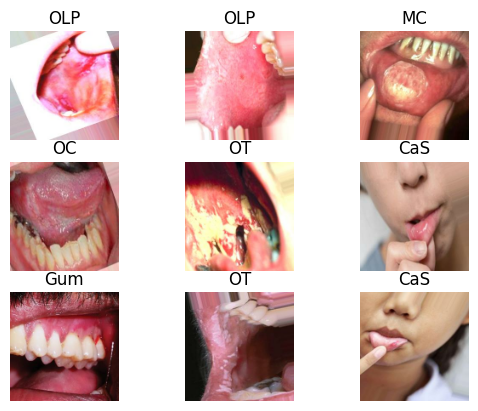

In [13]:
plt.Figure(figsize= (8,8))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i +1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')


In [14]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.shuffle(1000).cache().prefetch(buffer_size= AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size= AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size= AUTOTUNE)

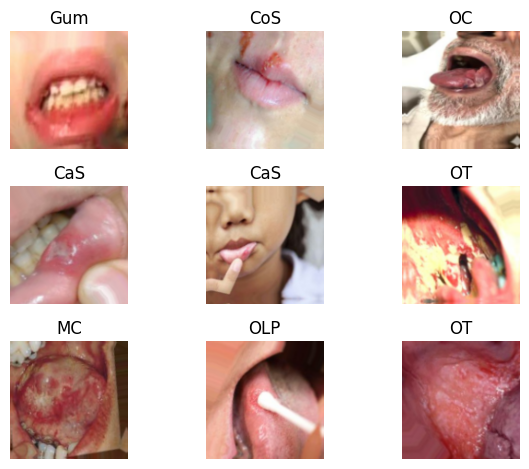

In [16]:
plt.Figure(figsize= (10, 10))
for images, labels in train_ds.take(1):
    augmented_img = data_augmentation(images)
    for i in range(9):
        ax = plt.subplot(3, 3, i +1)
        plt.imshow(augmented_img[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

plt.tight_layout()
plt.show()


In [18]:
num_classes = 7

model = keras.Sequential([

    data_augmentation,

    #normalization
    layers.Rescaling(1./255, input_shape = (128, 128, 3)),

    layers.Conv2D(32,(3,3), activation = 'relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128,(3,3), activation = 'relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(256,(3,3), activation= 'relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(128, activation = 'relu'),

    layers.Dropout(0.5),

    layers.Dense(num_classes, activation = 'softmax')
])

In [21]:
optimizer = Adam(learning_rate=0.000005)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 100,
)

Epoch 1/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9475 - loss: 0.1494 - val_accuracy: 0.9562 - val_loss: 0.1501
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9529 - loss: 0.1271 - val_accuracy: 0.9660 - val_loss: 0.1163
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9609 - loss: 0.1002 - val_accuracy: 0.9708 - val_loss: 0.0993
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9657 - loss: 0.0921 - val_accuracy: 0.9698 - val_loss: 0.0945
Epoch 5/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9706 - loss: 0.0934 - val_accuracy: 0.9718 - val_loss: 0.0894
Epoch 6/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9664 - loss: 0.0994 - val_accuracy: 0.9747 - val_loss: 0.0839
Epoch 7/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9778 - loss: 0.0789 - val_accuracy: 0.9747 - val_loss: 0.0818
Epoch 8/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9701 - loss: 0.0843 - val_accuracy: 0.

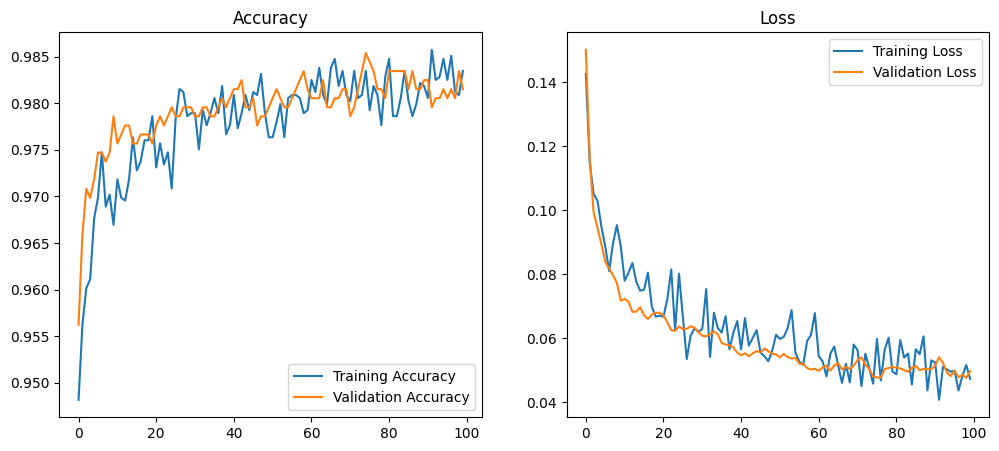

In [23]:
acc     = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')

plt.show()

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    patience = 5,
    restore_best_weights = True
)

In [25]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 100,
    callbacks = [early_stop]
)

Epoch 1/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9858 - loss: 0.0416 - val_accuracy: 0.9825 - val_loss: 0.0502
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9868 - loss: 0.0428 - val_accuracy: 0.9883 - val_loss: 0.0467
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9889 - loss: 0.0377 - val_accuracy: 0.9854 - val_loss: 0.0466
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9736 - loss: 0.0562 - val_accuracy: 0.9835 - val_loss: 0.0468
Epoch 5/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9825 - loss: 0.0446 - val_accuracy: 0.9854 - val_loss: 0.0471
Epoch 6/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9851 - loss: 0.0448 - val_accuracy: 0.9825 - val_loss: 0.0477
Epoch 7/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9871 - loss: 0.0387 - val_accuracy: 0.9815 - val_loss: 0.0482
Epoch 8/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9795 - loss: 0.0529 - val_accuracy: 0.

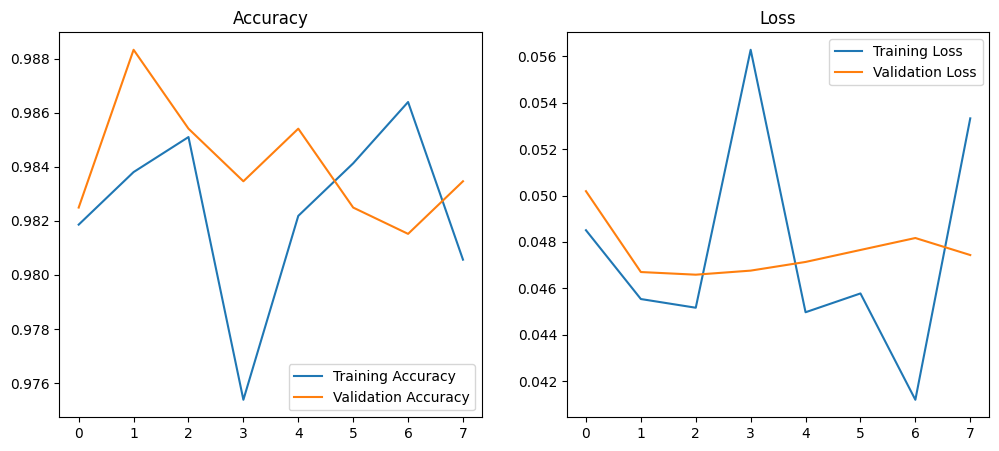

In [26]:
acc     = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')

plt.show()

In [27]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9814 - loss: 0.0839
Test Accuracy: 0.9805
Test Loss: 0.0836


In [28]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 128, 128, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (32, 128, 128, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 126, 126, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 63, 63, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 61, 61, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (32, 28, 28, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (32, 14, 14, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (32, 12, 12, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (32, 6, 6, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (32, 9216)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 128)              │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (32, 128)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 7)                │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,707,287 (17.96 MB)

 Trainable params: 1,569,095 (5.99 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,138,192 (11.97 MB)

### pretrain model Fine-tuning

In [59]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras import Input
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision

# loading pretrain model without first layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
print(len(base_model.layers)) # numbers of layers

175


In [30]:
base_model.trainable = False


In [31]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])


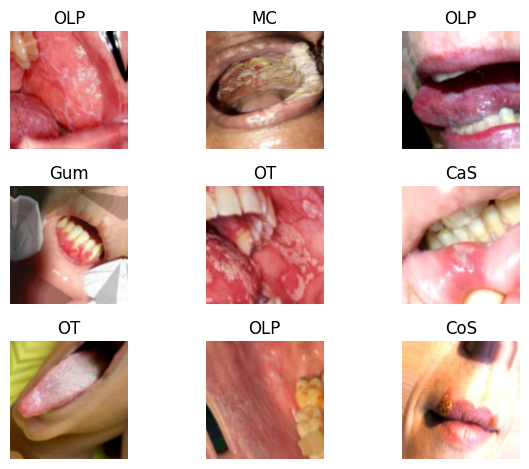

In [32]:
plt.Figure(figsize= (10, 10))
for images, labels in train_ds.take(1):
    augmented_img = data_augmentation(images)
    for i in range(9):
        ax = plt.subplot(3, 3, i +1)
        plt.imshow(augmented_img[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

plt.tight_layout()
plt.show()

In [49]:

inputs = tf.keras.Input(shape=(128,128,3))
x = preprocess_input(inputs)      # normalization
x = data_augmentation(x)
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

In [50]:
model.compile(optimizer= Adam(learning_rate=0.00005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [51]:
base_model.trainable = True

In [52]:
for layer in base_model.layers[:-40]:
    layer.trainable = False        #  train 40 layers

In [62]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [63]:
history = model.fit(train_ds, validation_data=val_ds, epochs=15)

Epoch 1/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 35s 178ms/step - accuracy: 0.9875 - loss: 0.0579 - val_accuracy: 0.1634 - val_loss: 632.4048
Epoch 2/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - accuracy: 0.9756 - loss: 0.0836 - val_accuracy: 0.9319 - val_loss: 0.3748
Epoch 3/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.9972 - loss: 0.0074 - val_accuracy: 0.9689 - val_loss: 0.1401
Epoch 4/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.9996 - loss: 0.0032 - val_accuracy: 0.9397 - val_loss: 0.4509
Epoch 5/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.9874 - loss: 0.0763 - val_accuracy: 0.9562 - val_loss: 0.1617
Epoch 6/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 0.9991 - loss: 0.0042 - val_accuracy: 0.9669 - val_loss: 0.1082
Epoch 7/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 1.0000 - loss: 4.4295e-04 - val_accuracy: 0.9698 - val_loss: 0.0942
Epoch 8/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - accuracy: 1.0000 - loss: 1.9312e-04 - val_accu

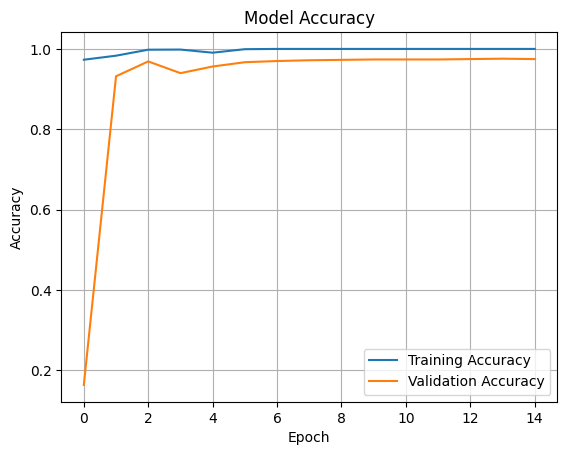

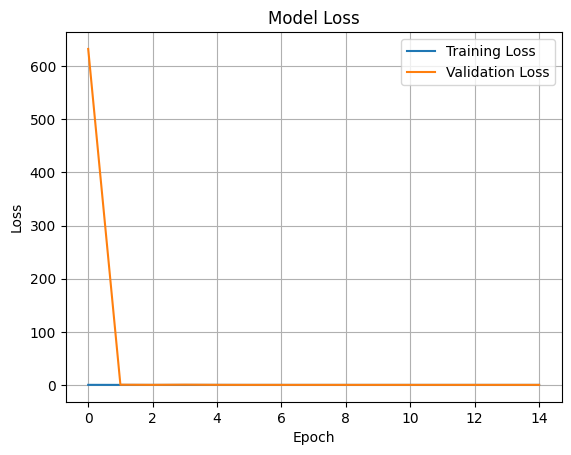

In [64]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.4f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9777 - loss: 0.1111
Test Accuracy: 0.9708


In [66]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 4, 4, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │        14,343 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,294,359 (210.93 MB)

 Trainable params: 15,846,151 (60.45 MB)

 Non-trainable params: 7,755,904 (29.59 MB)

 Optimizer params: 31,692,304 (120.90 MB)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

         CaS       0.96      0.99      0.98       160
         CoS       0.99      0.99      0.99       149
         Gum       0.98      0.97      0.98       120
          MC       0.98      0.97      0.97       180
          OC       0.95      0.95      0.95       108
         OLP       0.96      0.95      0.95       180
          OT       0.97      0.98      0.97       131

    accuracy                           0.97      1028
   macro avg       0.97      0.97      0.97      1028
weighted avg       0.97      0.97      0.97      1028



In [58]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>